In [101]:
import pandas as pd
df = pd.read_csv("../../data/annonces-ventes-69.csv",delimiter=';',header=0,encoding="UTF-8",low_memory=False)
print (df.shape)
# display(df.head(20))
df = df [df.typedebien == "a"]
print (df.info())


(133369, 59)
<class 'pandas.core.frame.DataFrame'>
Index: 89190 entries, 6 to 133368
Data columns (total 59 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   idannonce                89190 non-null  object 
 1   type_annonceur           89190 non-null  object 
 2   typedebien               89190 non-null  object 
 3   typedetransaction        89190 non-null  object 
 4   etage                    89190 non-null  int64  
 5   surface                  89190 non-null  int64  
 6   surface_terrain          3219 non-null   float64
 7   nb_pieces                89190 non-null  int64  
 8   prix_bien                89190 non-null  int64  
 9   prix_maison              0 non-null      float64
 10  prix_terrain             0 non-null      float64
 11  mensualiteFinance        89190 non-null  int64  
 12  balcon                   89190 non-null  int64  
 13  eau                      89190 non-null  int64  
 14  bain         

In [102]:
# drop empy columns
print (df.shape)
# threshold = 90%
threshold = int(df.shape[0]*0.9)
empty_cols = []
for name,_ in df.items() :
    if df[name].isna().sum() > threshold :
        empty_cols.append(name) 
print (f"empty cols {empty_cols}")
# remove empty cols
df = df.drop(columns=empty_cols)
print(df.isna().sum())
# remove unnecessary columns
columns = ["typedebien","typedetransaction","mensualiteFinance","nb_terraces","REG","DEP"]
df = df.drop(columns=columns)
# check for columns content
for column in df.columns:
    print(f"{column}: {df[column].unique()}")
columns = ["type_annonceur","typedebien_lite",'duree_int']
df = df.drop(columns=columns)

(89190, 59)
empty cols ['surface_terrain', 'prix_maison', 'prix_terrain', 'parking', 'videophone', 'surface_balcon']
idannonce                      0
type_annonceur                 0
typedebien                     0
typedetransaction              0
etage                          0
surface                        0
nb_pieces                      0
prix_bien                      0
mensualiteFinance              0
balcon                         0
eau                            0
bain                           0
dpeL                           0
dpeC                       22455
mapCoordonneesLatitude         0
mapCoordonneesLongitude        0
annonce_exclusive              0
nb_etages                  28163
places_parking             60456
cave                       50236
exposition                     0
ges_class                  15799
annee_construction         55046
nb_toilettes               40830
nb_terraces                73392
porte_digicode             68759
ascenseur                

In [103]:
#keep rows with no Nans
#keep rows with no Nans on these attributes

subset = ["chauffage_mode","chauffage_systeme","chauffage_energie","annee_construction","cave","charges_copro","ascenseur"]
df= df.dropna(subset=subset)
print(df.shape)
df.isna().sum()
df.info()

for column in df.columns:
    print(f"{column}: {df[column].unique()}")

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#         display(df.head(100))


(7618, 44)
<class 'pandas.core.frame.DataFrame'>
Index: 7618 entries, 6 to 127946
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   idannonce                7618 non-null   object 
 1   etage                    7618 non-null   int64  
 2   surface                  7618 non-null   int64  
 3   nb_pieces                7618 non-null   int64  
 4   prix_bien                7618 non-null   int64  
 5   balcon                   7618 non-null   int64  
 6   eau                      7618 non-null   int64  
 7   bain                     7618 non-null   int64  
 8   dpeL                     7618 non-null   object 
 9   dpeC                     6775 non-null   float64
 10  mapCoordonneesLatitude   7618 non-null   float64
 11  mapCoordonneesLongitude  7618 non-null   float64
 12  annonce_exclusive        7618 non-null   object 
 13  nb_etages                7157 non-null   float64
 14  places_parking  

In [104]:


# clean column nb_logements_copro
df["nb_logements_copro"] = df["nb_logements_copro"].fillna(df["nb_logements_copro"].mean()).astype("int")
df["nb_logements_copro"].unique()

# clean anne construction 
df["annee_construction"] = df["annee_construction"].fillna(df["annee_construction"].mean())
df["annee_construction"] = df["annee_construction"].astype("int")
df["annee_construction"].unique()

# places parking , set nan to zero
df["places_parking"] = df["places_parking"].fillna(0)
df["places_parking"] = df["places_parking"].astype("int")
df["places_parking"].unique()

# dpe 
df["dpeL"] = df["dpeL"].replace(to_replace=["D - 231 kWh/m².year","D-218 kWh/m².year","Blank"],value=["D","D","U"])
df["dpeL"].unique()

# replace Électricité by Elec
print(df["chauffage_energie"].unique())
df["chauffage_energie"] = df["chauffage_energie"].replace(to_replace=["Électrique"],value=["Elec"])
print(df["chauffage_energie"].value_counts())

# gaz a effet de serre : set to unknown
print(df["ges_class"].isna().sum())
df["ges_class"] = df["ges_class"].fillna("U")
print(df["ges_class"].value_counts())

#  clarify exposition
df["exposition"] = df["exposition"].replace(to_replace=["0"],value=["Unknown"])
df["exposition"] = df["exposition"].replace(to_replace=["N","NO","NS","Nord-Sud","Nord Est Ouest"],value=["Nord","Nord-Ouest","Nord","Nord","Nord-Est"])
df["exposition"] = df["exposition"].replace(to_replace=["SO"],value=["Sud-Ouest"])
df["exposition"] = df["exposition"].replace(to_replace=["Sud-Est-Ouest"],value=["Sud-Est"])
df["exposition"] = df["exposition"].replace(to_replace=["Est-Ouest"],value=["Est"])
print(df["exposition"].value_counts())

df["nb_toilettes"] = df["nb_toilettes"].fillna(1).astype(int)
print (df["nb_toilettes"].isna().sum())

df["dpeC"] = df["dpeC"].fillna(0)
print (df["dpeC"].isna().sum())

nb_etage = df['nb_etages'].value_counts().index[0]
df["nb_etages"] = df["nb_etages"].fillna(nb_etage).astype(int)
print(f" etages {df['nb_etages'].value_counts()}")

print (df['porte_digicode'].isna().sum())
df["porte_digicode"] = df["porte_digicode"].fillna(False)

attributes = ["loyer_m2_median_n6","nb_log_n6","taux_rendement_n6"]
for attribute in attributes :
    df[attribute]= df[attribute].fillna(0)
    
attributes = ["loyer_m2_median_n7","nb_log_n7","taux_rendement_n7"]
for attribute in attributes :
    df[attribute]= df[attribute].fillna(0)

# charges copro / remove spurious value
df['charges_copro'] = df['charges_copro'].apply(lambda x : df['charges_copro'].mean()  if x > 80000 else x)
print (df['charges_copro'].max())

df['annee_construction'] = df['annee_construction'].apply(lambda x : df['annee_construction'].mean()  if x <1900  else x)
print (df['annee_construction'].min())


['Électrique' 'Gaz' 'Fioul']
chauffage_energie
Gaz      5325
Elec     2222
Fioul      71
Name: count, dtype: int64
156
ges_class
D     2002
C     1792
B     1253
E     1115
A      473
VI     442
F      222
U      156
NS      93
G       70
Name: count, dtype: int64
exposition
Unknown       3522
Est           1452
Nord           718
Sud            506
Ouest          378
Sud-Ouest      372
Sud-Est        350
Nord-Ouest     169
Nord-Est       151
Name: count, dtype: int64
0
0
 etages nb_etages
5     1846
4     1247
6     1098
7      804
3      742
8      614
2      396
9      291
10     144
11     121
1       74
12      61
14      41
13      36
15      33
16      33
17      14
18       8
19       6
20       6
21       3
Name: count, dtype: int64
3904
13599.96
1900.0


/tmp/ipykernel_1429/783603646.py:48: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["porte_digicode"] = df["porte_digicode"].fillna(False)


In [105]:
df.isna().sum()

idannonce                  0
etage                      0
surface                    0
nb_pieces                  0
prix_bien                  0
balcon                     0
eau                        0
bain                       0
dpeL                       0
dpeC                       0
mapCoordonneesLatitude     0
mapCoordonneesLongitude    0
annonce_exclusive          0
nb_etages                  0
places_parking             0
cave                       0
exposition                 0
ges_class                  0
annee_construction         0
nb_toilettes               0
porte_digicode             0
ascenseur                  0
nb_logements_copro         0
charges_copro              0
chauffage_energie          0
chauffage_systeme          0
chauffage_mode             0
categorie_annonceur        0
logement_neuf              0
date                       0
INSEE_COM                  0
IRIS                       0
CODE_IRIS                  0
TYP_IRIS_x                 0
TYP_IRIS_y    

<class 'pandas.core.indexes.base.Index'>


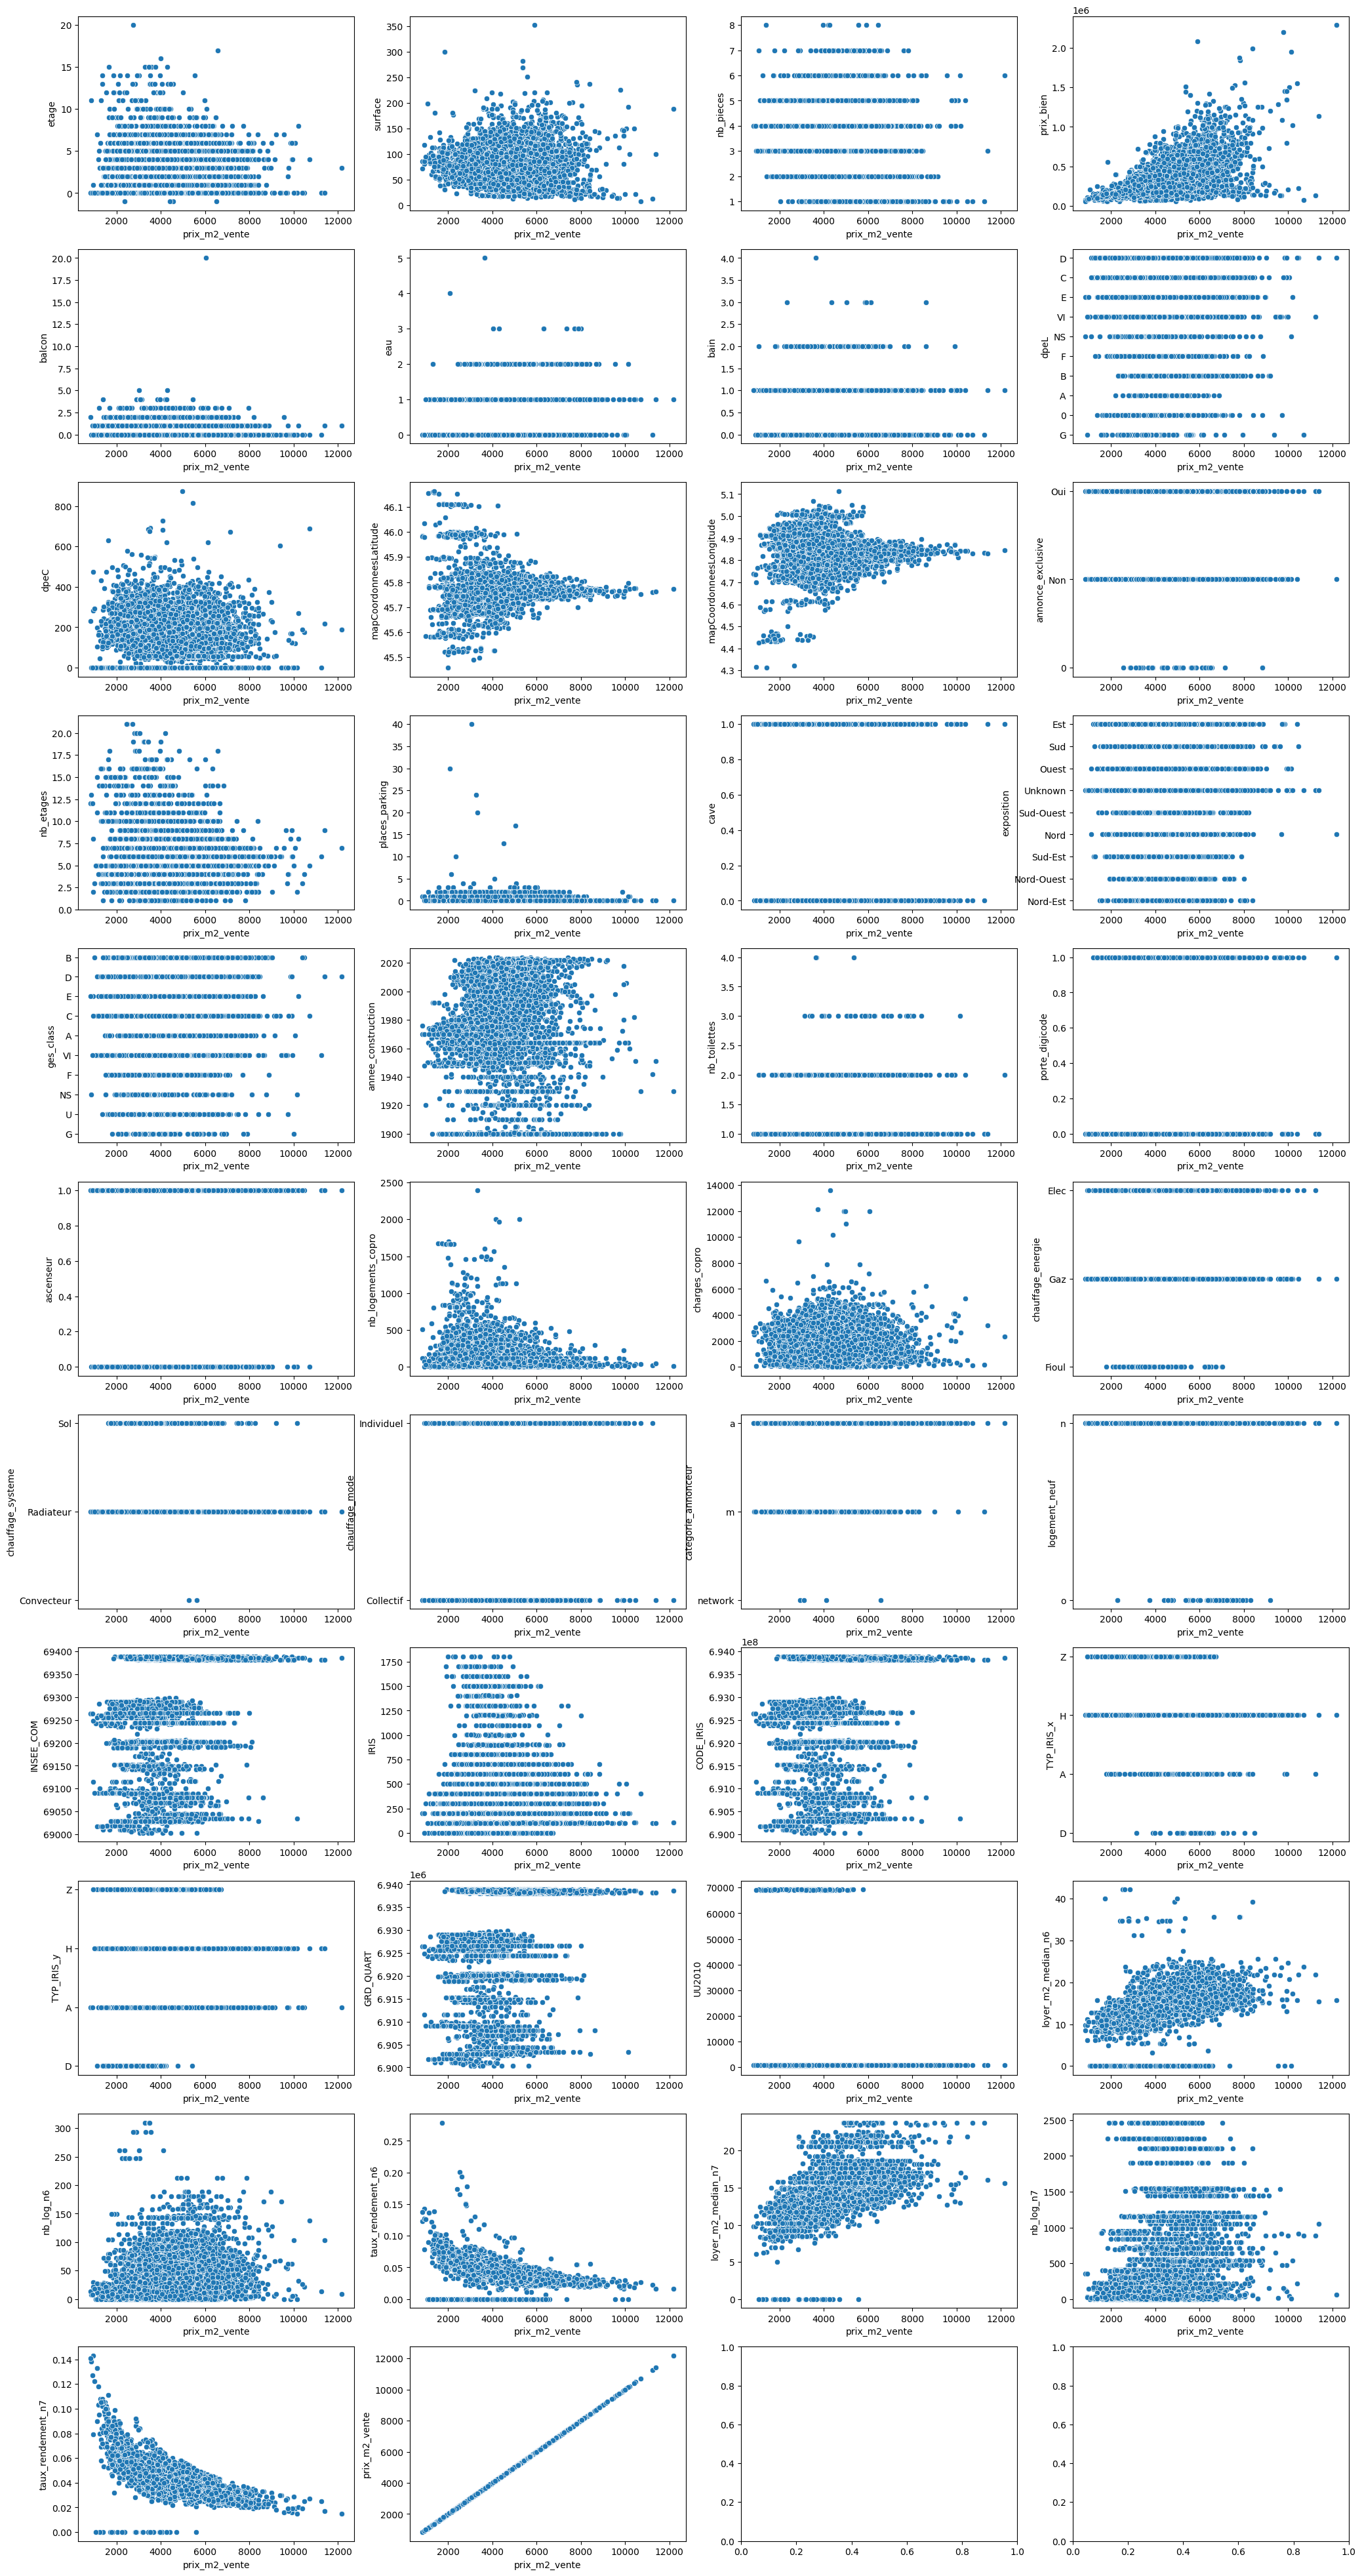

In [135]:
columns = df.columns
print (type(columns))
fig , axes = plt.subplots(nrows = 11, ncols = 4, figsize = (25,50))
index = 0
for column in columns :
    if column not in ["idannonce","date"] :
        sns.scatterplot(ax=axes[int(index/4),index%4],x=df["prix_m2_vente"],y=df[column])
        index = index +1

        